In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

calendar_df = pd.read_csv('../input/calendar.csv')
listing_df = pd.read_csv('../input/listings.csv')
reviews_df = pd.read_csv('../input/reviews.csv')

['reviews.csv', 'calendar.csv', 'listings.csv']


## Here, I'll be examining the Seattle Airbnb data using a CRISP-DM process.  For those unfamiliar, the CRISP-DM (Cross-Industry Standard Process for Data Mining) is as follows:
### 1.  Business Understanding - What is the Overall Goal?
### 2.  Data Understanding - What data do you need and how is it structured?
### 3.  Data Preparation - Data is generally "messy" and needs to be filtered
### 4.  Modeling - Often our topics of interest require models to make predictions for future data
### 5.  Evaluation - Models need to be evaluated for their effectiveness
### 6.  Deployment - Use the results of this process in order to accomplish the initial goal
<br>
## For me, I have three topics to examine:
### 1.  Is there a peak season for demand in Airbnbs in Seattle?  If so, when is it?
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For me, this is interesting to establish seasonality.  Hosts may want to offer promotions during the off-season in order to get their room filled.  Also, they can probably maximize revenue by charging more during the in-season.
### 2.  What attributes correlate with being a Superhost?
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; If I plan on hosting on Airbnb, what should I do to become a Superhost?
### 3.  How much does the average Airbnb host earn per year from each listing?
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; This is potentially useful for people considering being an Airbnb host.
<br>
<br>

## 1.  Is there a peak season for renting Airbnbs in Seattle?  If so, when is it?
<br>
### Business Understanding
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In order to understand seasonality of the service sold.
### Data Understanding
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I'll need average room prices per day in order to see the annual shifts in demand.  The greater the price, the greater the demand.

In [2]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### Data Preparation
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; First, I create a new dataframe that will give us prices.

In [3]:
calendar_price_df = calendar_df[calendar_df['price'].isnull() == False]
calendar_price_df['price_2'] = calendar_price_df['price'].map(lambda x: pd.to_numeric(x[1:].replace(",", "")))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Next, I average these prices by day and plot them
<br>
### Modeling
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I can't say there's much of a model here, but we see the result through visual inspection.

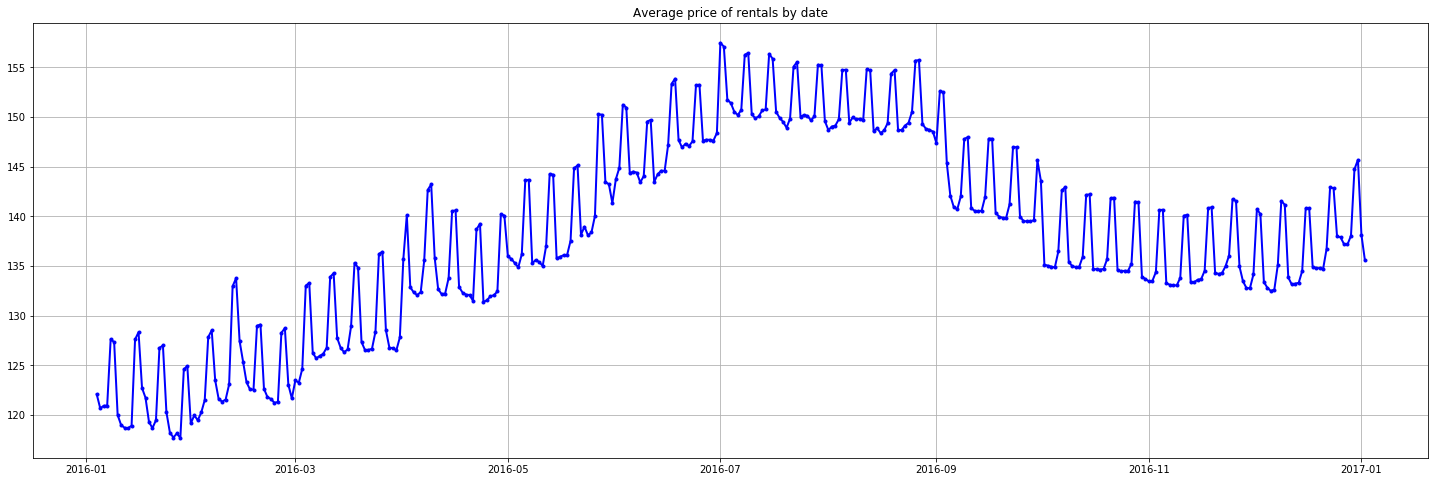

In [4]:
calendar_price_grouped_df = calendar_price_df.groupby(['date'])['price_2'].mean().reset_index()
calendar_price_grouped_df['date'] = pd.to_datetime(calendar_price_grouped_df['date'])
plt.figure(figsize=(25, 8))
plt.plot(calendar_price_grouped_df['date'], calendar_price_grouped_df['price_2'], color='b', marker='.', linewidth=2)
plt.title("Average price of rentals by date")
plt.grid()

### Evaluation
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; So, we see a linear climb in average prices from around 120 to 150 dollars per night from January to July.  Prices stay high from July to August, fall throughout September, and then stay steady throughout the rest of the year.
<br>
### Deployment
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In sum, the highest demand season is summer, and the lowest demand season is late winter.  Airbnb hosts can use this knowledge accordingly for their own pricing and promotions.
<br>

## 2.  What factors correlate with being a superhost?
### Business Understanding
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; It seems that earning the status of Superhost would offer some advantages in the eyes of consumers and potentially in the search algorithms Airbnb designed.  So, how does one acquire the title?
<br>
### Data Understanding
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For this, I think we need to examine several attributes and compare them between Superhosts vs. non-Superhosts.  This will give us a general idea of how they're different.
<br>
### Data Preparation
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We'll need to separate Superhost from non-Superhost and compare them by the same attributes.

#### First, what is the percentage of superhosts in the dataset?

In [5]:
super_pct = listing_df[listing_df['host_is_superhost'] == 't'].shape[0] / listing_df.shape[0]
print('%.0f percent of hosts are Superhosts' % (super_pct*100))

20 percent of hosts are Superhosts


#### Next, I separate the hosts from superhosts and prepare for modeling

In [6]:
listing_superhost_df = listing_df[listing_df['host_is_superhost'] == 't']
listing_normhost_df = listing_df[listing_df['host_is_superhost'] == 'f']

### Modeling
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Here, we'll be visually comparing a few attributes between Superhost and non-Superhost

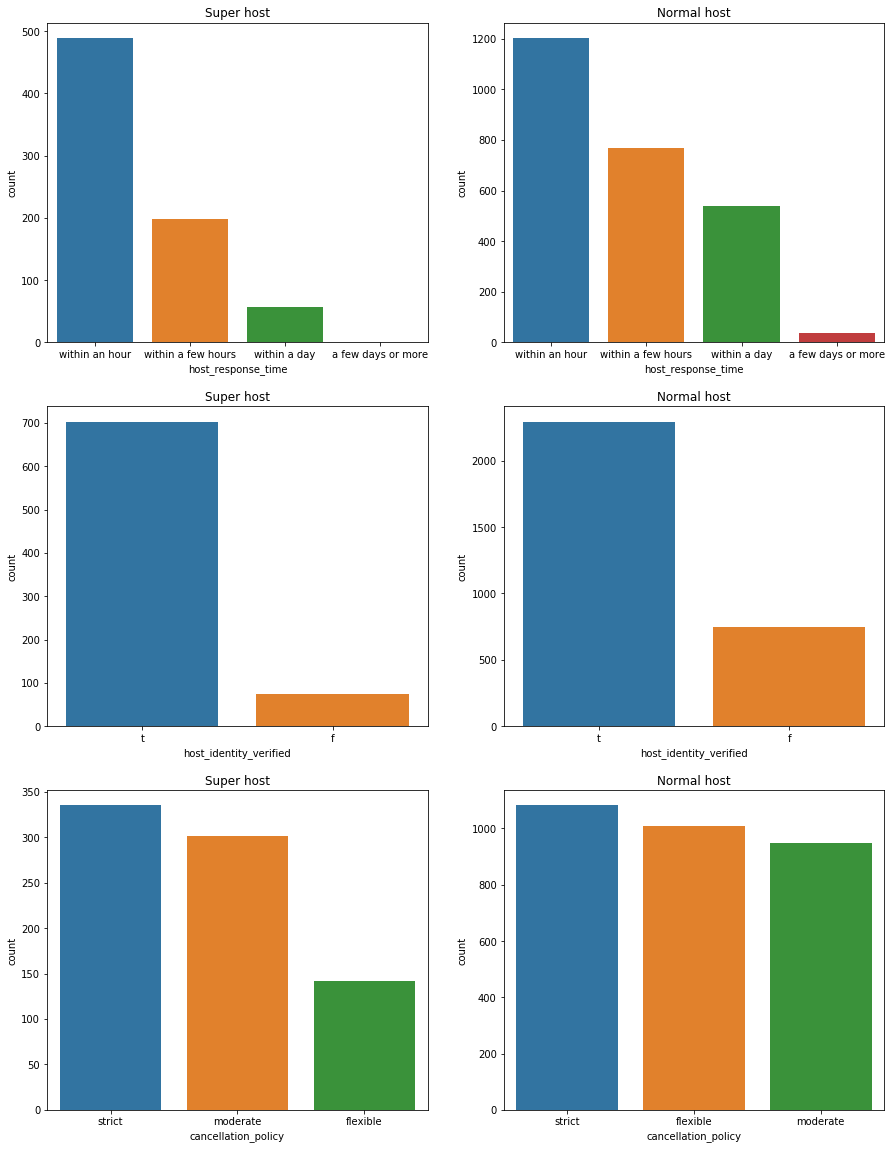

In [7]:
fig, ax = plt.subplots(3,2, figsize=(15,20))

ax[0,0].set_title('Super host')
ax[0,1].set_title('Normal host')
ax[1,0].set_title('Super host')
ax[1,1].set_title('Normal host')
ax[2,0].set_title('Super host')
ax[2,1].set_title('Normal host')

sns.countplot(listing_superhost_df['host_response_time'], ax=ax[0,0], order = listing_superhost_df['host_response_time'].value_counts().index)
sns.countplot(listing_normhost_df['host_response_time'], ax=ax[0,1], order = listing_normhost_df['host_response_time'].value_counts().index)
sns.countplot(listing_superhost_df['host_identity_verified'], ax=ax[1,0], order = listing_superhost_df['host_identity_verified'].value_counts().index)
sns.countplot(listing_normhost_df['host_identity_verified'], ax=ax[1,1], order = listing_normhost_df['host_identity_verified'].value_counts().index)
sns.countplot(listing_superhost_df['cancellation_policy'], ax=ax[2,0], order = listing_superhost_df['cancellation_policy'].value_counts().index)
sns.countplot(listing_normhost_df['cancellation_policy'], ax=ax[2,1], order = listing_normhost_df['cancellation_policy'].value_counts().index);

### Evaluation
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Through visual inspection, it appears that Superhosts usually respond within an hour, are more likely to have their identity verified, and don't offer flexible cancellation plans.
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We further confirm this through descriptive statistics.

In [8]:
within_an_hour_super = listing_superhost_df['host_response_time'][listing_superhost_df['host_response_time'] == 'within an hour'].count() / listing_superhost_df.shape[0]
within_an_hour_norm = listing_normhost_df['host_response_time'][listing_normhost_df['host_response_time'] == 'within an hour'].count() / listing_normhost_df.shape[0]
identity_super = listing_superhost_df['host_identity_verified'][listing_superhost_df['host_identity_verified'] == 't'].count() / listing_superhost_df.shape[0]
identity_norm = listing_normhost_df['host_identity_verified'][listing_normhost_df['host_identity_verified'] == 't'].count() / listing_normhost_df.shape[0]
flexible_cancel_super = listing_superhost_df['cancellation_policy'][listing_superhost_df['cancellation_policy'] == 'flexible'].count() / listing_superhost_df.shape[0]
flexible_cancel_norm = listing_normhost_df['cancellation_policy'][listing_normhost_df['cancellation_policy'] == 'flexible'].count() / listing_normhost_df.shape[0]

print('Superhosts respond within an hour %.0f percent of the time.' % (within_an_hour_super*100))
print('Typical hosts respond within an hour %.0f percent of the time.' % (within_an_hour_norm*100))
print(' ')
print('Superhosts confirm their identity %.0f percent of the time.' % (identity_super*100))
print('Typical hosts confirm their identity %.0f percent of the time.' % (identity_norm*100))
print(' ')
print('Superhosts have flexible cancellation policies %.0f percent of the time.' % (flexible_cancel_super*100))
print('Typical hosts have flexible cancellation policies %.0f percent of the time.' % (flexible_cancel_norm*100))

Superhosts respond within an hour 63 percent of the time.
Typical hosts respond within an hour 40 percent of the time.
 
Superhosts confirm their identity 90 percent of the time.
Typical hosts confirm their identity 76 percent of the time.
 
Superhosts have flexible cancellation policies 18 percent of the time.
Typical hosts have flexible cancellation policies 33 percent of the time.


### Deployment
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; It looks like if someone wants to be a Superhost, they need to prioritize responding within an hour to potential inquiries, confirming their identities, and having firm cancellation plans.

## 3.  What does the average Airbnb host earn per year per listing?

### Business Understanding
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For people considering becoming Airbnb hosts in Seattle, it's probably useful to know how much the average host is currently earning per year.  This will help new, potential hosts decide whether they should put their property up for traditional renting or up on Airbnb or perhaps not up for rent at all.
<br>
### Data Understanding
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To answer this, we'll need to know how many days a given property was occupied as well as what price it was occupied at per property.  Once this is known, we can find the total income per property, and then find the average total income per property.
<br>
### Data Preparation
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We'll need to create a dataframe for the number of days a given property was occupied as well as another dataframe for the average price per property.  After that, we can merge the two together on the listing_id and multiply average price by number of days occupied.

#### I'll calculate this by assuming that whenever a location is not available, it is occupied, and that it earned the average price per night occupied

In [9]:
calendar_price_df.head(5)

,listing_id,date,available,price,price_2
0,241032,2016-01-04,t,$85.00,85.0
1,241032,2016-01-05,t,$85.00,85.0
9,241032,2016-01-13,t,$85.00,85.0
10,241032,2016-01-14,t,$85.00,85.0
14,241032,2016-01-18,t,$85.00,85.0


In [10]:
avg_price_df = calendar_price_df.groupby(['listing_id'])['price_2'].mean().reset_index()

In [11]:
calendar_no_price_df = calendar_df[calendar_df['price'].isnull() == True]

In [12]:
avg_stays_df = calendar_no_price_df.groupby(['listing_id'])['available'].count().reset_index()

In [13]:
avg_stays_df = avg_stays_df.rename(index=str, columns={'available':'num_occupied'})

In [14]:
avg_stays_df.head()

,listing_id,num_occupied
0,3335,56
1,5682,56
2,7369,312
3,9460,308
4,9531,185


In [15]:
avg_price_df.head()

,listing_id,price_2
0,3335,120.000000
1,4291,82.000000
2,5682,53.944984
3,6606,92.849315
4,7369,85.000000


In [16]:
avg_stays_df.shape[0]

3140

In [17]:
avg_price_df.shape[0]

3723

#### Keep in mind that not all locations are ever rented.  Some are always available.
#### For instance, listing_id 4291 is always available

In [18]:
calendar_df[(calendar_df['listing_id'] == 4291) & (calendar_df['available'] == 'f')].head(5)

,listing_id,date,available,price


In [19]:
full_earnings_df = avg_stays_df.merge(avg_price_df, how='left', on='listing_id')

#### This new dataframe has 3,140 rows.  95 of those rows have no prices because they were occupied every single day.  Given that this is such a small portion of our dataset (about 3%), I'll drop those rows.

In [20]:
full_earnings_df.shape[0]

3140

In [21]:
full_earnings_df[full_earnings_df['price_2'].isnull() == True].shape[0]

95

In [22]:
full_earnings_df = full_earnings_df.dropna()

In [23]:
full_earnings_df['total_earnings'] = full_earnings_df['price_2'] * full_earnings_df['num_occupied']

### Modeling
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Here, our objective is simply to see the average and median earnings per year.

#### The average earnings per year on Seattle Airbnb rooms is $18,250.

#### The median earnings per year is $11,700.

In [24]:
full_earnings_df['total_earnings'].mean()

18250.850089528314

In [25]:
full_earnings_df['total_earnings'].median()

11700.0

### Evaluation
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Interestingly, the mean is much higher than the median, which seems to indicate that a few very high earning Airbnb locations are skewing our results to the right.  So, when we look at a histogram, we see what we expect.  Most Airbnb rooms make less than $25,000.

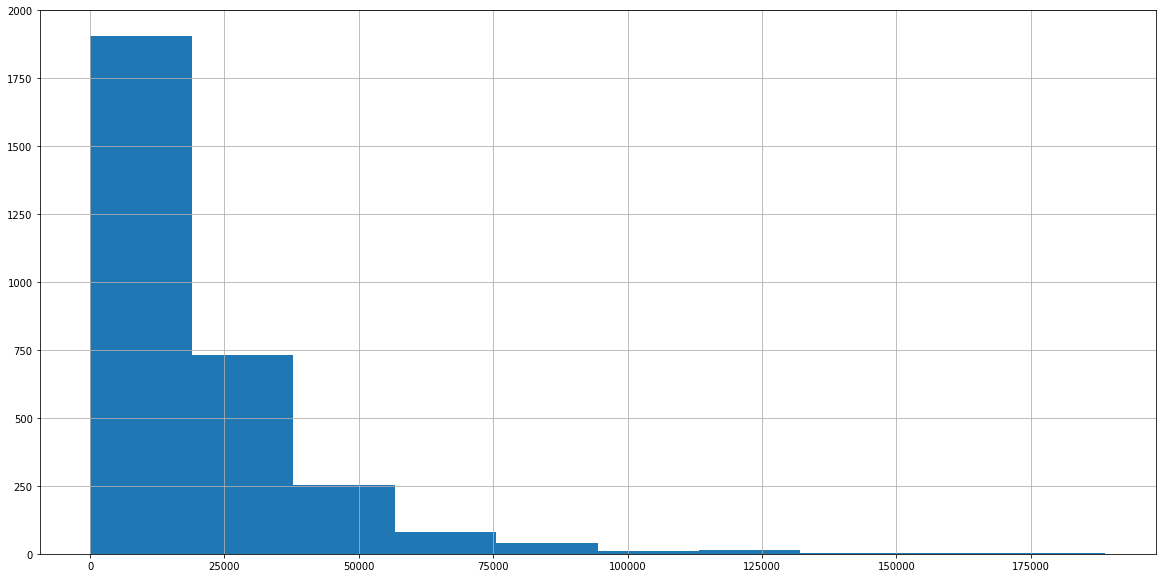

In [26]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
full_earnings_df['total_earnings'].hist();

### Deployment
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Essentially, it's probably unreasonable for someone to assume that they'll make more than \\$18,000 by hosting an Airbnb.
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The typical person will be earning around \\$11,700.
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Also, these results seem to suggest that the typical Airbnb is on the smaller side, with a few being much larger and able to charge much higher prices.

## In summary,
* Demand in Seattle's Airbnb market fluctuates largely based upon seasonality.  Seattle's highest demand season is during the summer, and its lowest demand season is during the late winter.
* Three factors are associated with being a superhost rather than a typical host.
    1. Superhosts generally respond within one hour to inquiries
    2. Superhosts are more likely to have verified their profile.
    3. Superhosts usually don't allow flexible cancellation policies.
* For people looking into hosting on Airbnb, the median earnings per year is \\$11,700.  So, half of hosts earn more than that, while half of hosts earn less than that.  This seems to be a good estimate of how much a host is likely to earn.
